In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
class BanditEPS:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1-1.0/self.N)*self.mean + (1.0/self.N)*x
        
def run_experiment_eps(m1, m2, m3, eps, N):
    bandits = [BanditEPS(m1), BanditEPS(m2), BanditEPS(m3)]

    data = np.empty(N)

    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
        
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
        print(b.N)

    return cumulative_average

class BanditOIV:
    def __init__(self, m, upper_limit):
        self.m = m
        self.mean = upper_limit
        self.N = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1-1.0/self.N)*self.mean + (1.0/self.N)*x
        
def run_experiment_oiv(m1, m2, m3, N, upper_limit=10):
    bandits = [BanditOIV(m1, upper_limit), BanditOIV(m2, upper_limit), BanditOIV(m3, upper_limit)]

    data = np.empty(N)

    for i in range(N):
        # optimistic initial values with greedy strategy
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
        
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
        print(b.N)

    return cumulative_average


def ucb1(mean, N, nj):
    # here we return infinite if this is first iteration for a particular bandit
    if nj==0:
        return float('inf')
    # otherwise we apply the below formula
    # here log(N) checks that the mean doesn't vary much bcos of the total iterations but
    # nj which is the count for a specific bandit controls the mean as the overall mean will be high
    # if nj is small making it the first choice to be chosen and if nj is large then mean will be smaller
    # making it a less important choice
    return mean+np.sqrt(2*np.log(N)/nj) 
    
    
def run_experiment_ucb1(m1, m2, m3, N, upper_limit=10):
    bandits = [BanditOIV(m1, upper_limit), BanditOIV(m2, upper_limit), BanditOIV(m3, upper_limit)]

    data = np.empty(N)

    for i in range(N):
        # ucb 1 for selecting best bandit machine
        # here we modify mean value based on ucb formula check method
        j = np.argmax([ucb1(b.mean, i+1, b.N) for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
        
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
        print(b.N)

    return cumulative_average

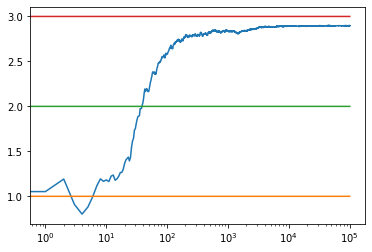

1.0003956528789713
3449
2.0077046697393097
3376
2.999798083256541
93175


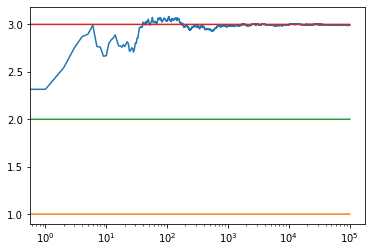

1.3702963654926812
1
2.7425605635100387
11
2.9897958340191133
99988


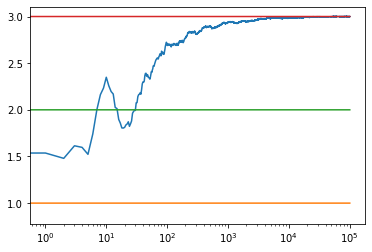

0.5280788787770123
4
2.1343554791029264
32
2.999377179471583
99964


In [31]:
c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
oiv = run_experiment_oiv(1.0, 2.0, 3.0, 100000)
ucb = run_experiment_ucb1(1.0, 2.0, 3.0, 100000)

C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


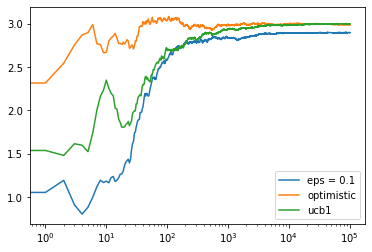

In [33]:
# log scale plot 
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='optimistic')
plt.plot(ucb, label='ucb1')
plt.legend()
plt.xscale('log')
plt.show()

C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


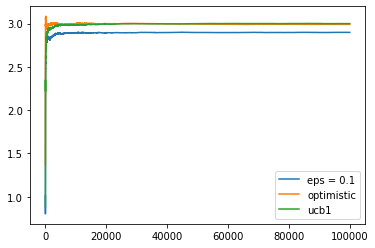

In [34]:
 # linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='optimistic')
plt.plot(ucb, label='ucb1')
plt.legend()
plt.show()

Here we can see that with ucb, cumulative average shift towards 0 faster than the epsilon greedy strategy.